In [43]:
#import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#import module for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [174]:
fignum = 1          #define figure number
figsize = (5,5)     #global  figure size

In [175]:

#define a function for ploting decision boundaries with support vectors

def plot_decision(clf, X, Y, figsize):
    global fignum
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=figsize)
    plt.clf()
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 100,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
   
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 1000)
    yy = np.linspace(ylim[0], ylim[1], 1000)
    YY, XX = np.meshgrid(yy, xx)
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=figsize)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    fignum = fignum + 1
    plt.show()

#### 2. Learn an SVM classifier using the dataset provided in data_linear_train.csv(you can use scikit learn) and report the results with observation as mentioned below.

In [176]:
#load data from 'data_linear_train.csv'
data_linear = pd.read_csv('data_linear_train.csv')
#print(data_linear.head())
X_linear = np.column_stack((data_linear.x1,data_linear.x2))       #define features 
Y_linear = data_linear.y                                          #define output

#split the train data into train and test with test=30%
X_train_linear, X_test_linear, Y_train_linear, Y_test_linear = train_test_split(X_linear,Y_linear,test_size=0.3,random_state=10)

###### Plot the data points in a 2D plot with different colors for the two classes.

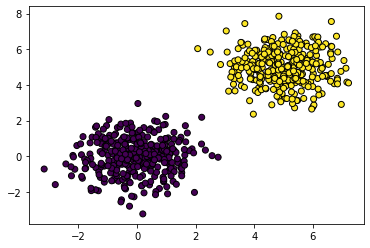

In [177]:
#plot the train data with different output classes
plt.scatter(X_train_linear[:, 0], X_train_linear[:, 1], c=Y_train_linear, edgecolors='k')

###### Print which kernel type is the best for this dataset.


In [ ]:
#best kernel is found by iterate over kernels linear, polynomial and rbf
#define SVC with these kernel by default parameters
#calcuated accuracy score for test data with all three classifiers
#best accuracy among three gives best classifier for this data

Decision Region with linear


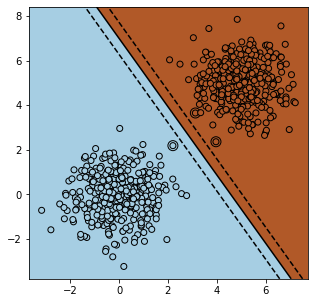

Decision Region with poly


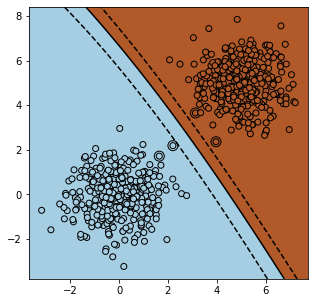

Decision Region with rbf


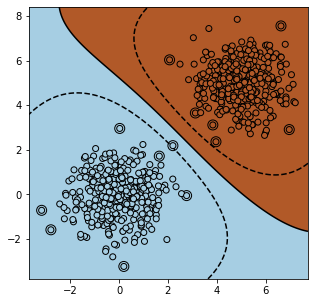

In [178]:
kernels = ['linear', 'poly', 'rbf']                            #define a list with all 3 kernels 
acc_score ={}                                                  #define a disctionary for saving accuracy of each classifier


#do svm classification with all three kernels with deafualt parameters
#claculate accuracy score 
#plot decision boundary with support vectors

for kernel in kernels:
    clf_1 = SVC(kernel=kernel)                                   
    clf_1.fit(X_train_linear, Y_train_linear)
    acc_score[kernel] = accuracy_score(Y_test_linear, clf_1.predict(X_test_linear))
    
    print("=======================================================")
    print("Decision Region with {}".format(kernel))
    plot_decision(clf_1, X_train_linear, Y_train_linear, figsize)


In [179]:
print("Accuracy scores: {}".format(acc_score))
acc_values = list(acc_score.values())                   #define a list with three accuracy scores
ind = acc_values.index(max(acc_values))                 #find index of maximum accuaracy score
print('Best kernel for the given data is {}'.format(kernels[ind]))  #kernel corresponding to maximum accuracy score
                                                                    #is best kernel

Accuracy scores: {'linear': 0.9965986394557823, 'poly': 0.9965986394557823, 'rbf': 0.9965986394557823}
Best kernel for the given data is linear


###### Perform hyperparameter tunning and print the values for the best hyperparameters that you have selected depending on the kernel type.

In [ ]:
#do hyperparameter tuning with linear kernel for finding best parameter

In [180]:
param_grid = {'C':[1000, 100, 10, 1, 0.1, 0.01, 0.001]}                      #define parametr dictionary
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=10)      #define cross validation as StratifiedSuffleSplit
grid = GridSearchCV(SVC(kernel='linear'), param_grid=param_grid, cv=cv)      #define grid search with svc as classifier with linear kernel
grid.fit(X_train_nonlinear, Y_train_nonlinear)

print("The best parameters is %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
    

The best parameters is {'C': 0.001} with a score of 0.51




For C = 1000


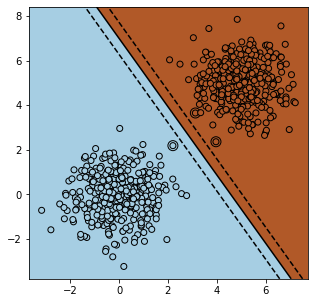

Accuracy score for train data
1.0
Accuracy score for test data
0.9965986394557823


For C = 100


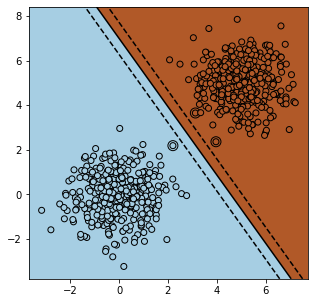

Accuracy score for train data
1.0
Accuracy score for test data
0.9965986394557823


For C = 1


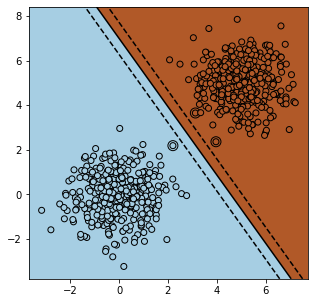

Accuracy score for train data
1.0
Accuracy score for test data
0.9965986394557823


For C = 0.01


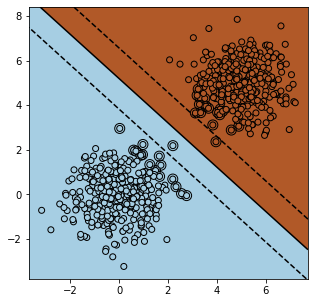

Accuracy score for train data
1.0
Accuracy score for test data
0.9965986394557823


For C = 0.001


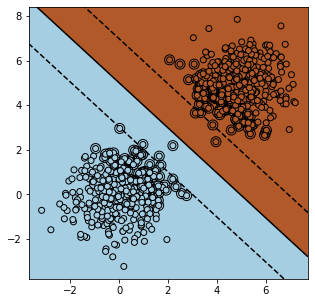

Accuracy score for train data
1.0
Accuracy score for test data
1.0


In [181]:
#observing the change in support vector positions with change values of C
C_value = [1000, 100, 1, 0.01, 0.001]

for C in C_value:
    print('\n============================================================\n')
    print('For C = {}'.format(C))
    clf_linear = SVC(kernel='linear', C=C)
    clf_linear.fit(X_train_linear, Y_train_linear)
    plot_decision(clf_linear, X_train_linear, Y_train_linear, figsize)
    
    print("Accuracy score for train data")
    print(accuracy_score(Y_train_linear, clf_linear.predict(X_train_linear)))
    print("Accuracy score for test data")
    print(accuracy_score(Y_test_linear, clf_linear.predict(X_test_linear)))



###### Plot the decision region plots learned by the classifier

In [ ]:
#from the above tests, linear kernel with C=0.001 is the best
#define classifier with linear kernal with c=0.001

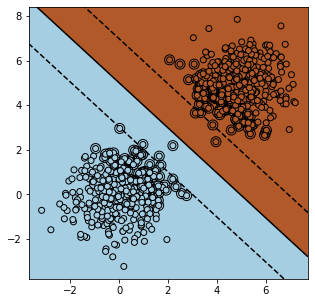

In [182]:
clf_linear = SVC(kernel='linear', C=0.001)                      
clf_linear.fit(X_train_linear, Y_train_linear)
plot_decision(clf_linear, X_train_linear, Y_train_linear, figsize)  #plot decision boundary with support vectors

###### Predict the labels y for the data points provided in data linear test.csv and store them in a new column named ’predictions’ in this csv file.

In [157]:
#load test data from 'data_linear_test.csv'
data_linear_test = pd.read_csv('data_linear_test.csv')
X = data_linear_test[['x1','x2']]                          #define features
data_linear_test.head() 

,x1,x2
0,-2.794472,-1.039104
1,5.186285,4.618729
2,-2.123100,1.039727
3,-0.269293,-0.110851
4,5.342423,6.242017


In [158]:
data_linear_test['predictions'] = clf_linear.predict(X)        #predict the classes with clf_linear classifier defined above
data_linear_test.head()

,x1,x2,predictions
0,-2.794472,-1.039104,0.0
1,5.186285,4.618729,1.0
2,-2.123100,1.039727,0.0
3,-0.269293,-0.110851,0.0
4,5.342423,6.242017,1.0


In [159]:
#update the result to the file 'data_linear_test.csv'
data_linear_test.to_csv('data_linear_test.csv', index=False)

###### Print the confusion matrix, accuracy scores for both the training and the test data points given in the two CSV files In the last cell of the linear dataset.

In [144]:
#calculate and print confusion matrix and accuracy score for train_linear data
print("Confusion matrix for train data")
print(confusion_matrix(Y_train_linear, clf_linear.predict(X_train_linear)))
print("Accuracy score for train data")
print(accuracy_score(Y_train_linear, clf_linear.predict(X_train_linear)))

Confusion matrix for train data
[[347   0]
 [  0 339]]
Accuracy score for train data
1.0


In [145]:
#calculate and print confusion matrix and accuracy score for test_linear data
print("Confusion matrix for test data")
print(confusion_matrix(Y_test_linear, clf_linear.predict(X_test_linear)))
print("Accuracy score for test data")
print(accuracy_score(Y_test_linear, clf_linear.predict(X_test_linear)))

Confusion matrix for test data
[[143   0]
 [  0 151]]
Accuracy score for test data
1.0


###### 3. Repeat question 1 with the files data_nonlinear_train.csv and data_nonlinear_test.csv.


In [183]:
#load data from 'data_nonlinear_train.csv'
data_nonlinear = pd.read_csv('data_nonlinear_train.csv')
data_nonlinear.head()


,x1,x2,y
0,2.468905,-2.687452,1.0
1,-3.432486,0.644840,1.0
2,2.757928,-0.966273,1.0
3,6.041461,2.322639,1.0
4,-0.239617,-1.355691,1.0


In [184]:
X_nonlinear = np.column_stack((data_nonlinear.x1,data_nonlinear.x2))   #define features and output 
Y_nonlinear = data_nonlinear.y

In [185]:
#split the train data to train and test data with test data=30%
X_train_nonlinear, X_test_nonlinear, Y_train_nonlinear, Y_test_nonlinear = train_test_split(X_nonlinear,Y_nonlinear,
                                                                                            test_size=0.3,random_state=10)

###### Plot the data points in a 2D plot with different colors for the two classes

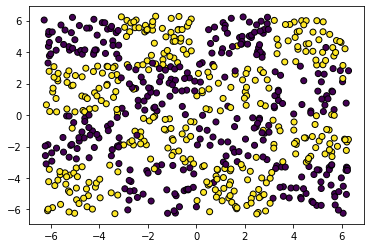

In [186]:
#plot the train_nonlinear data with different classes
plt.scatter(X_train_nonlinear[:, 0], X_train_nonlinear[:, 1], c=Y_train_nonlinear, edgecolors='k')

###### Print which kernel type is the best for this dataset.

In [ ]:
#best kernel is found by iterate over kernels linear, polynomial and rbf
#define SVC with these kernels by default parameters
#calcuated accuracy score for test data with all three classifiers
#best accuracy among three gives best classifier for this data

Decision Region with linear


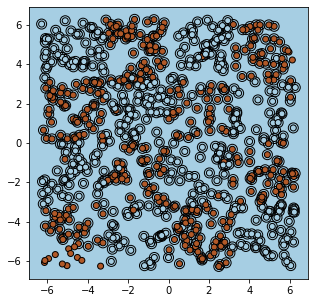

Decision Region with poly


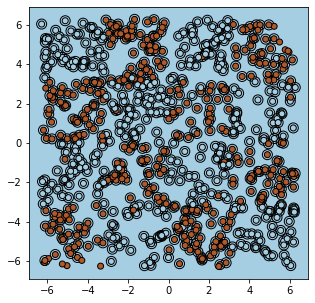

Decision Region with rbf


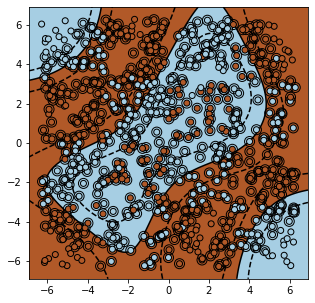

In [187]:
kernels = ['linear', 'poly', 'rbf']             #list of kernels
acc_score ={}                                   #dictionary for saving accuracy scores

for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train_nonlinear, Y_train_nonlinear)
    acc_score[kernel] = accuracy_score(Y_test_nonlinear, clf.predict(X_test_nonlinear))
    
    print("=========================================================")
    print("Decision Region with {}".format(kernel))
    plot_decision(clf, X_train_nonlinear, Y_train_nonlinear, figsize)


In [153]:
print("Accuracy scores: {}".format(acc_score))
acc_values = list(acc_score.values())                      #define a list with three accuracy values
ind = acc_values.index(max(acc_values))                    #index coresponding to maximum score
print('Best kernel for the given data is {}'.format(kernels[ind])) #print kernel with maximum accuracy score as best kernel

Accuracy scores: {'linear': 0.48299319727891155, 'poly': 0.48299319727891155, 'rbf': 0.6020408163265306}
Best kernel for the given data is rbf


###### Perform hyperparameter tunning and print the values for the best hyperparameters that you have selected depending on the kernel type.

In [ ]:
#hypertune the parameters wrt 'rbf' kernel

In [173]:
C_value = [1000, 100, 10, 1, 0.1, 0.01, 0.001]                  #define C values
gamma_value = [1e-1, 1, 1e1]                                    #define different damma values
param_grid = dict(gamma=gamma_value, C=C_value)                 #define parameter dictionary
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=10)  #define cross validation as StratifirdShuffleSplit
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)     #define grid search with SVC classifier with rbf kernel
grid.fit(X_train_nonlinear, Y_train_nonlinear)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 100, 'gamma': 0.1} with a score of 0.91




For C = 1000


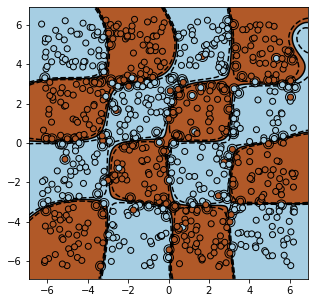

Accuracy score for train data
0.9489795918367347
Accuracy score for test data
0.9115646258503401


For C = 100


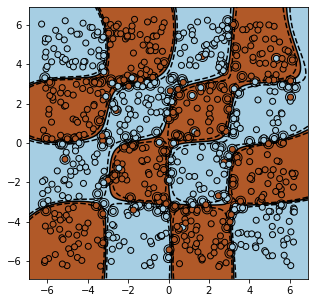

Accuracy score for train data
0.9489795918367347
Accuracy score for test data
0.9081632653061225


For C = 10


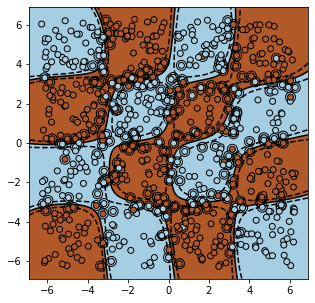

Accuracy score for train data
0.9154518950437318
Accuracy score for test data
0.8945578231292517


For C = 0.01


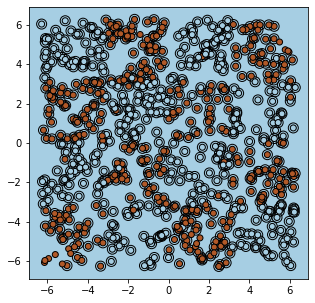

Accuracy score for train data
0.5131195335276968
Accuracy score for test data
0.48299319727891155


For C = 0.001


In [ ]:
#observing the change in support vector positions with change values of C
C_value = [1000, 100, 10, 0.01, 0.001]

for C in C_value:
    print('\n============================================================\n')
    print('For C = {}'.format(C))
    clf_nonlinear = SVC(kernel='rbf', gamma=0.1, C=C)
    clf_nonlinear.fit(X_train_nonlinear, Y_train_nonlinear)
    plot_decision(clf_nonlinear, X_train_nonlinear, Y_train_nonlinear, figsize)
    
    
    print("Accuracy score for train data")
    print(accuracy_score(Y_train_nonlinear, clf_nonlinear.predict(X_train_nonlinear)))
    
    print("Accuracy score for test data")
    print(accuracy_score(Y_test_nonlinear, clf_nonlinear.predict(X_test_nonlinear)))



###### Plot the decision region plots learned by the classifier

In [ ]:
#from the above tests, best kernel is rbf with c=100 and gamma=0.1

In [ ]:
#define the the SVC classifier with rbf kernel with c=100 and gamma=0.1
clf_nonlinear = SVC(kernel='rbf', gamma=0.1, C=100)
clf_nonlinear.fit(X_train_nonlinear, Y_train_nonlinear)                    #fit the classifier with train data
plot_decision(clf_nonlinear, X_train_nonlinear, Y_train_nonlinear, figsize) #plot decision boundary with support vectors

###### Predict the labels y for the data points provided in data nonlinear test.csv and store them in a new column named ’predictions’ in this csv file.

In [108]:
#load test data given in the file 'data_nonlinear_test.csv'
data_nonlinear_test = pd.read_csv('data_nonlinear_test.csv')
X = data_nonlinear_test[['x1','x2']]                           #define features
data_nonlinear_test.head()

,x1,x2
0,-6.249406,6.136730
1,5.093672,-3.673956
2,-2.607655,0.251455
3,5.050567,6.077485
4,-3.046816,0.808760


In [109]:
data_nonlinear_test['predictions'] = clf_nonlinear.predict(X)       #predict the classes with the above classifier
data_nonlinear_test.head()

,x1,x2,predictions
0,-6.249406,6.136730,0.0
1,5.093672,-3.673956,0.0
2,-2.607655,0.251455,0.0
3,5.050567,6.077485,1.0
4,-3.046816,0.808760,0.0


In [156]:
data_nonlinear_test.to_csv('data_nonlinear_test.csv', index=False)    #update the result to the file 'data_nonlinear_test,csv'

###### Print the confusion matrix, accuracy scores for both the training and the test data points given in the two CSV files In the last cell of the linear dataset.

In [111]:
#calculate and print confusion matrix and accuracy score for train_linear data
print("Confusion matrix for train data")
print(confusion_matrix(Y_train_nonlinear, clf_nonlinear.predict(X_train_nonlinear)))
print("Accuracy score for train data")
print(accuracy_score(Y_train_nonlinear, clf_nonlinear.predict(X_train_nonlinear)))

Confusion matrix for train data
[[319  15]
 [ 20 332]]
Accuracy score for train data
0.9489795918367347


In [113]:
#calculate and print confusion matrix and accuracy score for test_linear data
print("Confusion matrix for test data")
print(confusion_matrix(Y_test_nonlinear, clf_nonlinear.predict(X_test_nonlinear)))
print("Accuracy score for test data")
print(accuracy_score(Y_test_nonlinear, clf_nonlinear.predict(X_test_nonlinear)))

Confusion matrix for test data
[[138  14]
 [ 13 129]]
Accuracy score for test data
0.9081632653061225


###### Write your observations with comparisons in the last cell

###### 1. Comparisons for linear data set

For the kernel selection train data is split to train and test, calculated accuracy score with respect to each kernel by default parameters for test data.
if we use train data for accuracy comparison we may get overfitted classifier as best classifier so i used test data (get by split train data) for comparison

From the plot we can find that data points are linearly seperable. So linear kernel is suited for this data. By examining the accuracy scores we will get same result.

if we plot decision boundary and support vectors for different values of C ranging from we can find that as C decreases from 1000 to 0.001 width of the decision margine increase.

For large value of C train data gives 100% accuracy but test data had <100% accuracy. which means the classifier overfitting.
For small  values of C classifier gives 100% accuracy for both train and test data.


Best SVC classifier for this data having C=0.001.
from the confusion matrix and accuracy scores for test and train data, there is no mis classification in both cases. model gives 100% accuracy

###### 2. Comparison for nonlinear data set
Similiar to non linear data set best kernel is compared by comparing the accuracy scores for test data with deafualt parameters.

From the plot of data set the two classes are non seperable. so linear kernel is not suited for this model.

By examining the accuracy scores wrt each kernel for test data, rbf kernel gives better result.


By doing hyperprameter tuning with grid search with rbf kernel best parameters found as C=100  and gamma=0.1

if we change value of C from 1000 to 0.001, accuracy for both train and test data falls. ie classifier tends to underfit.


with optimum classifier got from grid search accuracy wrt train data is 94% nd wrt test data is 91%. 
for traain data there 
